# Thermisches Gebäudemodell
In der folgenden Übung soll für ein einfaches thermisches Gebäude-Modell der Heizwärmebedarf auf Basis eines Klimadatensatzes, der thermischen Hülle des Gebäudes und der Nutzungsprofile ermittelt werden.


### Nutzungsprofile
Lesen Sie das File "data/usage_profiles.csv", das stündliche Profile zu Nutzungsinformationen eines Gebäudes enthält, in einen Pandas dataframe ``usage`` ein. 
> Hint: use the parameter ``encoding="cp1252"`` , to specify that the file is encoded in Windows-1252 (typical german excel). See the difference without

In [11]:
#!more "data/usage_profiles.csv"

In [12]:
import pandas as pd
usage = pd.read_csv("data/usage_profiles.csv", encoding="cp1252")
#usage

### Jahressummen der Profile
Ermitteln Sie die Jahressummen der internen Gewinne, WW Bedarf, Allgemeinstrom (Aufzug,..), Beleuchtung und Nutzerstrom und stellen Sie Sie in einem Balkendiagramm dar
> Hint: Siehe https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

7497,1,0.030420516,7.963721033,3.981860517,0.474751742,0.07,3.286285853,0.57570615,0.2,0,2.712383504,0.504577544
7498,1,0.030420516,7.451123259,3.72556163,0.474751742,0.07,2.222197761,0.57570615,0.2,0,2.842786294,0.442515476
7499,1,0.030420516,7.526380573,3.763190286,0.474751742,0.07,1.82790405,0.57570615,0.2,0,2.883126777,0.42053516
7500,1,0.030420516,7.969861168,3.984930584,0.474751742,0.07,2.616491472,0.57570615,0.2,0,3.12084748,0.500375425
7501,1,0.030420516,8.188597052,4.094298526,0.474751742,0.07,3.405078894,0.57570615,0.2,0,3.097315531,0.442838716
7502,1,0.030420516,7.682402029,3.841201014,0.474751742,0.07,2.222197761,0.57570615,0.2,0,2.82597776,0.469667631
7503,1,0.030420516,7.042583559,3.521291779,0.474751742,0.07,1.420467215,0.57570615,0.2,0,2.623795102,0.466758472
7504,1,0.030420516,7.056918285,3.528459143,0.474751742,0.07,1.420467215,0.57570615,0.2,0,2.631479003,0.542073377
7505,1,0.030420516,7.896395696,3.948197848,0.474751742,0.07,2.222197761,0.57570615,0.2,0,3.081467484,

<AxesSubplot:title={'center':'Nutzerspezifische Wärmegewinne und Bedarfe'}, ylabel='${kWh}/{m^2}$'>

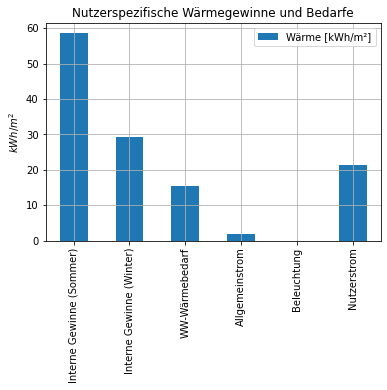

In [3]:
cols = {"Qi Sommer W/m²": "Interne Gewinne (Sommer)",
        "Qi Winter W/m²": "Interne Gewinne (Winter)",
        "Warmwasserbedarf_W_m2": "WW-Wärmebedarf",
        "Aufzug, Regelung etc._W_m2": "Allgemeinstrom",
        "Beleuchtung_W_m2": "Beleuchtung",
        "Nutzerstrom_W_m2": "Nutzerstrom"}
uses_kWh = usage[cols.keys()].rename(columns=cols).sum().round(-1)/1000
uses_kWh.name="Wärme [kWh/m²]"
pd.DataFrame(uses_kWh).plot.bar(stacked=True, grid=True, ylabel="${kWh}/{m^2}$", title="Nutzerspezifische Wärmegewinne und Bedarfe")

<AxesSubplot:title={'center':'Nutzerspezifische Wärmegewinne und Bedarfe'}, ylabel='${kWh}/{m^2}$'>

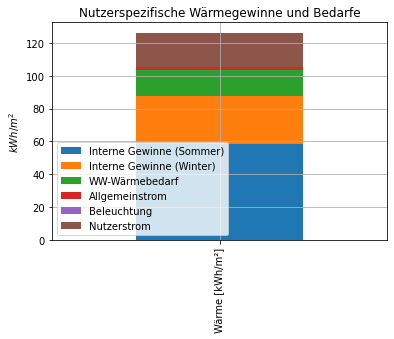

In [4]:
# Stacking the plot is possible, by first transposing the Dataframe into a single row of columns
pd.DataFrame(uses_kWh).transpose().plot.bar(stacked=True, grid=True, ylabel="${kWh}/{m^2}$", title="Nutzerspezifische Wärmegewinne und Bedarfe")

Die Internen Wärmegewinne und die Nutzerstrombedärfe sind doch etwas anderes


In [5]:
#but the internal gains are a little overpowering, so let's split it in 
usage

,H,Betriebszeit_-,Pers/m2,Qi Sommer W/m²,Qi Winter W/m²,Luftwechsel_Anlage_1_h,Luftwechsel_Infiltration_1_h,Warmwasserbedarf_W_m2,Lüfterstrom_W_m2,"Aufzug, Regelung etc._W_m2",Beleuchtung_W_m2,Nutzerstrom_W_m2,Abwärme W/m²
0,1,0.932044,0.02589,3.259419,1.629710,0.372818,0.07,0.394294,0.425494,0.2,0,0.909772,0.533346
1,2,0.932044,0.02589,3.131303,1.565651,0.372818,0.07,0.394294,0.425494,0.2,0,0.841097,0.456415
2,3,0.932044,0.02589,3.093674,1.546837,0.372818,0.07,0.788587,0.425494,0.2,0,0.820927,0.535285
3,4,0.932044,0.02589,3.116072,1.558036,0.372818,0.07,0.788587,0.425494,0.2,0,0.832933,0.525911
4,5,0.932044,0.02589,3.393807,1.696904,0.474752,0.07,1.590318,0.425494,0.2,0,0.981808,0.850121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8756,0.932044,0.02589,9.843693,4.921846,0.372818,0.07,1.984612,0.425494,0.2,0,3.312912,0.506517
8756,8757,0.932044,0.02589,8.079231,4.039616,0.372818,0.07,1.590318,0.425494,0.2,0,2.789446,0.509103
8757,8758,0.932044,0.02589,7.208397,3.604198,0.372818,0.07,0.788587,0.425494,0.2,0,2.322649,0.555649
8758,8759,0.932044,0.02589,5.072893,2.536447,0.372818,0.07,0.788587,0.425494,0.2,0,1.741074,0.409222


### Zusammenstellen der thermischen Verluste
Erstellen Sie eine Funktion ``thermal_balance``, der folgende Verlustterme der thermischen Energiebilanz für jede Stunde des Jahres ermittelt daraus den Heizwärmebedarf berechnet(pro m² NGF) und alle Terme in Form eines Pandas dataframe zurückgibt:

$0 = - Q_I - Q_S - Q_T - Q_V + Q_{HWB}$ 

Verwenden Sie für die Internen Wärmegewinne von 22.9. bis 21.3. das Winterprofil, sonst das Sommerprofil 